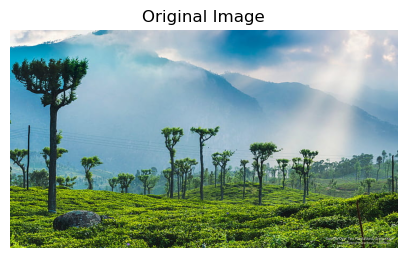

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, image):
    plt.figure(figsize=(5, 5))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image (change the path if needed)
image = cv2.imread("tea.jpg")  # Make sure the image is in the same folder
if image is None:
    print("Image not found. Please upload an image named 'your_image.jpg'")
else:
    show_image("Original Image", image)


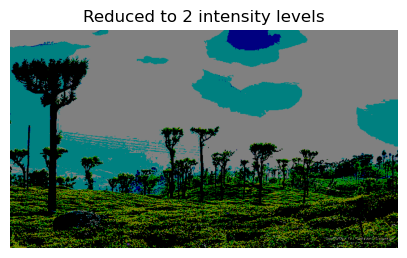

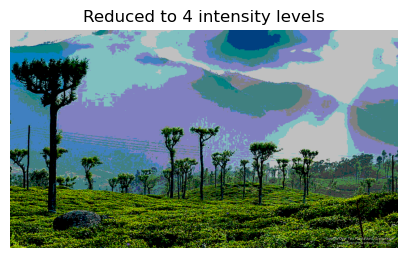

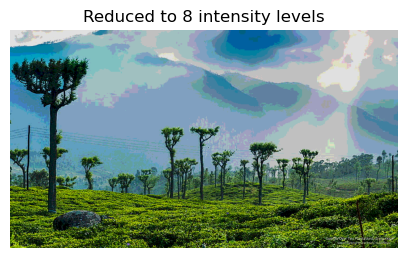

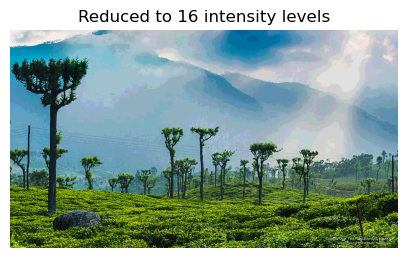

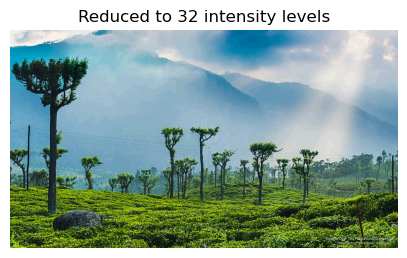

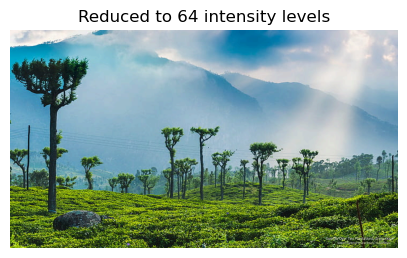

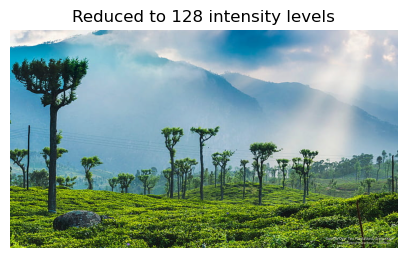

In [2]:
def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    return reduced_image

# Try different levels: 2, 4, 8, 16, 32, etc.
for level in [2, 4, 8, 16, 32, 64, 128]:
    reduced = reduce_intensity_levels(image, level)
    show_image(f"Reduced to {level} intensity levels", reduced)


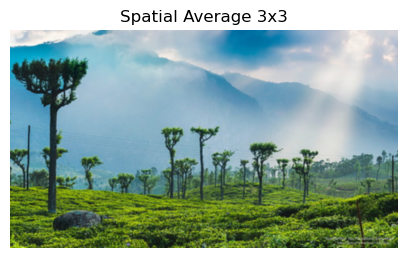

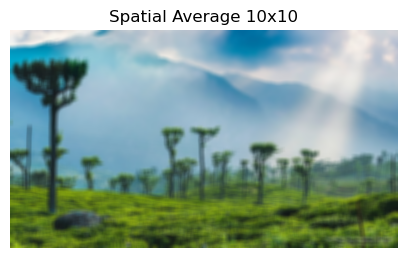

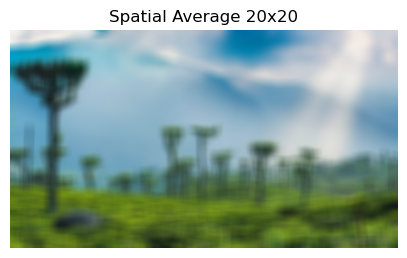

In [3]:
def spatial_average(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

for size in [3, 10, 20]:
    blurred = spatial_average(image, size)
    show_image(f"Spatial Average {size}x{size}", blurred)


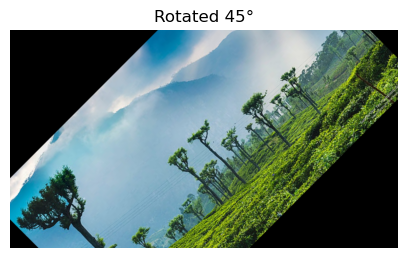

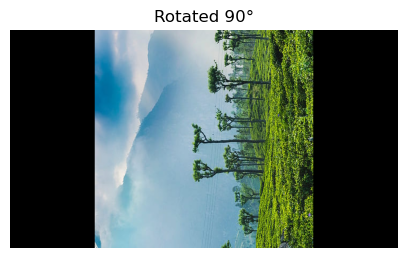

In [4]:
# Rotation
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

rotated_45 = rotate_image(image, 45)
rotated_90 = rotate_image(image, 90)
show_image("Rotated 45°", rotated_45)
show_image("Rotated 90°", rotated_90)

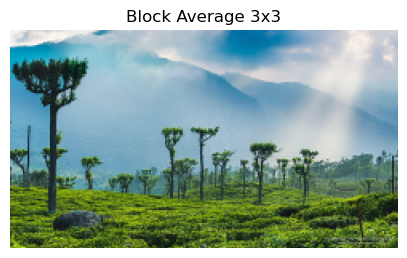

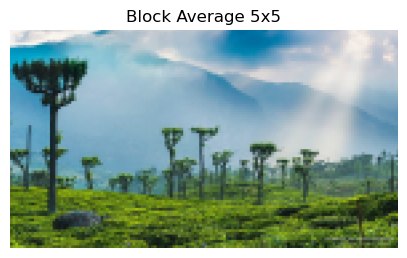

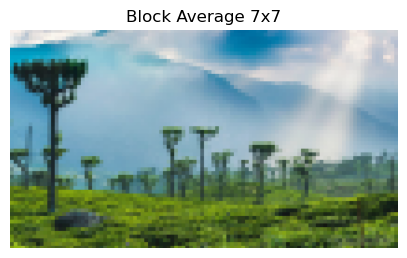

In [5]:
# Block Averaging
def block_average(image, block_size):
    h, w = image.shape[:2]
    result = image.copy()
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = image[y:y+block_size, x:x+block_size]
            if block.size == 0:
                continue
            avg_color = block.mean(axis=(0, 1), dtype=int)
            result[y:y+block_size, x:x+block_size] = avg_color
    return result

for block in [3, 5, 7]:
    reduced = block_average(image, block)
    show_image(f"Block Average {block}x{block}", reduced)